In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
_data = pd.read_csv('NYPD_Arrests_Data__Historic_.csv')
_data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
1,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)
2,193260691,02/06/2019,NaN,NaN,NaN,NaN,PL 2203400,F,M,14,0.0,25-44,M,UNKNOWN,986685.0,215375.0,40.757839,-73.991212,POINT (-73.99121211099998 40.75783900300007)
3,149117452,01/06/2016,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0.0,25-44,M,BLACK,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035)
4,190049060,11/15/2018,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0.0,25-44,M,BLACK,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)


In [5]:
columns = ['ARREST_KEY', 'OFNS_DESC', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'Latitude','Longitude']
_data = _data[columns]
_data.head()

,ARREST_KEY,OFNS_DESC,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,32311380,DANGEROUS DRUGS,18-24,M,BLACK,NaN,NaN
1,192799737,SEX CRIMES,45-64,M,BLACK,40.800694,-73.941109
2,193260691,NaN,25-44,M,UNKNOWN,40.757839,-73.991212
3,149117452,RAPE,25-44,M,BLACK,40.648650,-73.950336
4,190049060,RAPE,25-44,M,BLACK,40.674583,-73.930222


In [6]:
data = _data

In [8]:
gAge = data[['AGE_GROUP', 'ARREST_KEY']].groupby('AGE_GROUP').count()
gAge = gAge.rename(columns={'ARREST_KEY': 'N_Arrest'})
gAge

,N_Arrest
AGE_GROUP,
1018,1
1024,1
1042,1
1048,1
18-24,1346183
...,...
956,1
959,1
965,1


In [21]:
gAge = gAge.reset_index()
gAge.head()

,AGE_GROUP,N_Arrest
0,1018,1
1,1024,1
2,1042,1
3,1048,1
4,18-24,1346183


In [23]:
columns = ['18-24','<18','25-44', '45-64', '65+']
gAge = gAge[gAge['AGE_GROUP'].isin(columns)]
gAge

,AGE_GROUP,N_Arrest
4,18-24,1346183
22,25-44,2393751
34,45-64,951323
36,65+,43786
89,<18,418131


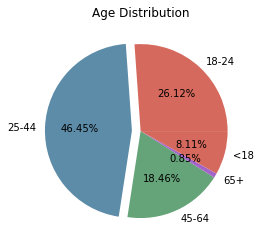

In [28]:
plt.pie(gAge.N_Arrest,
        labels=['18-24','25-44','45-64','65+','<18'], 
        colors=["#d5695d", "#5d8ca8", "#65a479", "#a564c9"],
        explode=(0, 0.1, 0, 0, 0),
        autopct='%.2f%%',
       )
plt.title("Age Distribution")
plt.show()

In [30]:
gAge = data[['PERP_SEX', 'ARREST_KEY']].groupby('PERP_SEX').count()
gAge = gAge.rename(columns={'ARREST_KEY': 'N_Arrest'})

gAge

,N_Arrest
PERP_SEX,
F,864872
M,4288497


In [1]:
plt.pie(gAge.N_Arrest,
        labels=['Femal', 'Male'], 
        colors=["#d5695d", "#a564c9"],
        autopct='%.2f%%',
       )
plt.title("Gender Distribution")
plt.show()

NameError: name 'plt' is not defined